# Time Series Analysis: Key Concepts and Definitions

## Table of Contents
1. [Introduction to Time Series](#Introduction-to-Time-Series)
2. [Key Terms in Time Series](#Key-Terms-in-Time-Series)
    - [Trend](#Trend)
    - [Seasonality](#Seasonality)
    - [Stationarity](#Stationarity)
    - [Cyclic Pattern](#Cyclic-Pattern)
    - [Autocorrelation](#Autocorrelation)
    - [Lag](#Lag)
    - [White Noise](#White-Noise)
    - [Moving Average](#Moving-Average)
    - [ARIMA Model](#ARIMA-Model)
    - [Forecasting](#Forecasting)
    - [Outliers](#Outliers)
3. [Conclusion](#Conclusion)

---

## 1. Introduction to Time Series <a id='Introduction-to-Time-Series'></a>

**Time Series** refers to a sequence of data points collected or recorded at specific time intervals. Examples include stock prices, daily temperatures, and sales data over months.

### Key Characteristics of a Time Series:
1. **Time-dependent data**: Data points are ordered based on time.
2. **Regular intervals**: Observations are recorded at fixed intervals (e.g., daily, monthly, yearly).

---

## 2. Key Terms in Time Series <a id='Key-Terms-in-Time-Series'></a>

### A. Trend <a id='Trend'></a>

**Definition**: A trend refers to the long-term movement or direction in data over time. It shows the overall upward, downward, or flat direction.

#### Example:
If you observe house prices in a city over the last 10 years, you may notice an upward trend as prices increase steadily over time.

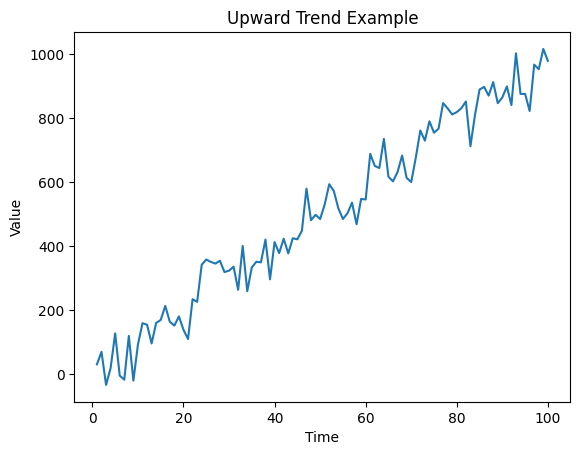

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulating upward trend data
time = np.arange(1, 101)
trend_data = time * 10 + np.random.normal(0, 50, 100)

plt.plot(time, trend_data)
plt.title('Upward Trend Example')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

### B. Seasonality <a id='Seasonality'></a>

**Definition**: Seasonality refers to repeating short-term cycles in the data at regular intervals, often influenced by time of year, holidays, or weather patterns.

#### Example:
Retail sales often increase during the holiday season (December) each year, reflecting seasonality.

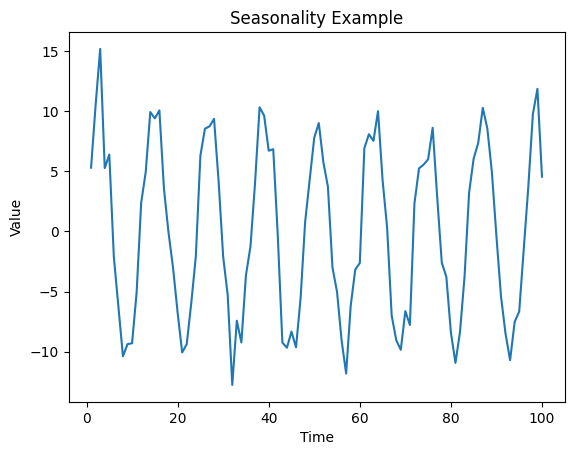

In [2]:
# Simulating seasonal data (sinusoidal wave)
seasonal_data = 10 * np.sin(2 * np.pi * time / 12) + np.random.normal(0, 2, 100)

plt.plot(time, seasonal_data)
plt.title('Seasonality Example')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

### C. Stationarity <a id='Stationarity'></a>

**Definition**: A time series is stationary if its statistical properties, such as mean and variance, are constant over time. Stationarity is important for many time series models to perform accurately.

#### Example:
Stock prices tend to be non-stationary, but the daily return of a stock (percentage change in price) may exhibit stationarity.

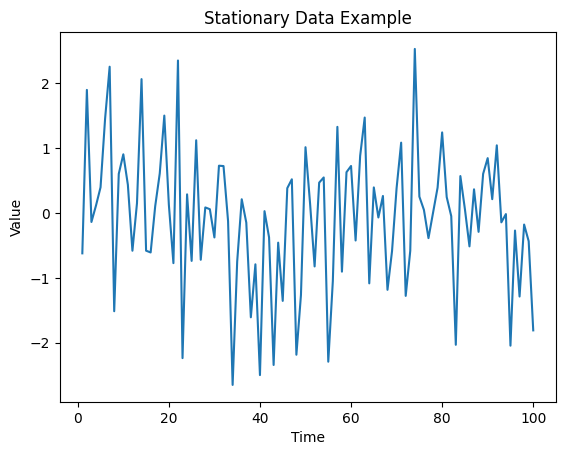

In [3]:
# Stationary data example
stationary_data = np.random.normal(0, 1, 100)

plt.plot(time, stationary_data)
plt.title('Stationary Data Example')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

### D. Cyclic Pattern <a id='Cyclic-Pattern'></a>

**Definition**: A cyclic pattern involves fluctuations that are not of a fixed period, unlike seasonality. These cycles are often driven by economic or business conditions.

#### Example:
Business cycles showing phases of expansion and contraction over several years.

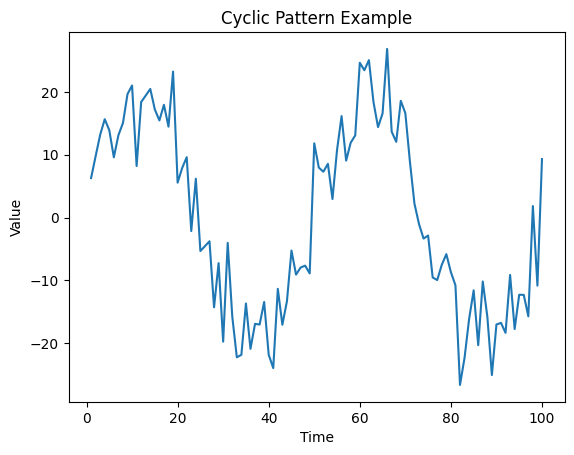

In [4]:
cyclic_pattern = 20 * np.sin(2 * np.pi * time / 50) + np.random.normal(0, 5, 100)

plt.plot(time, cyclic_pattern)
plt.title('Cyclic Pattern Example')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

### E. Autocorrelation <a id='Autocorrelation'></a>

**Definition**: Autocorrelation measures how data points in a time series are related to their previous values (lags). High autocorrelation indicates that past values significantly influence current values.

#### Example:
In temperature data, a hot day is often followed by another hot day, showing positive autocorrelation.

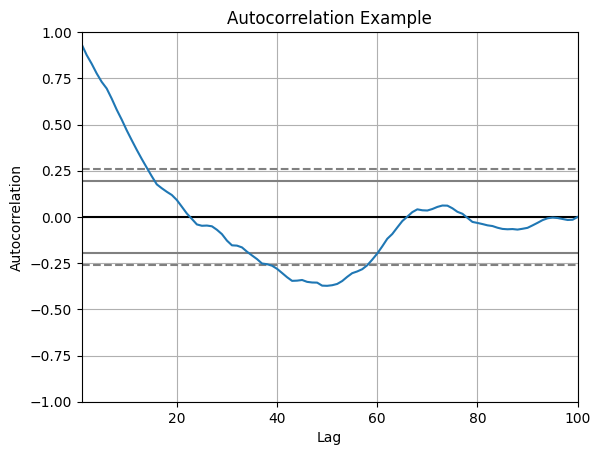

In [5]:
from pandas.plotting import autocorrelation_plot
import pandas as pd

# Simulating autocorrelated data
autocorr_data = pd.Series(np.cumsum(np.random.randn(100)))
autocorrelation_plot(autocorr_data)
plt.title('Autocorrelation Example')
plt.show()

### F. Lag <a id='Lag'></a>

**Definition**: A lag refers to the past value(s) of a time series used to predict future values. Lag-1 means using the previous observation, lag-2 means using the observation two steps back, and so on.

#### Example:
In predicting sales, you might use the previous month's sales (lag-1) to forecast the next month.

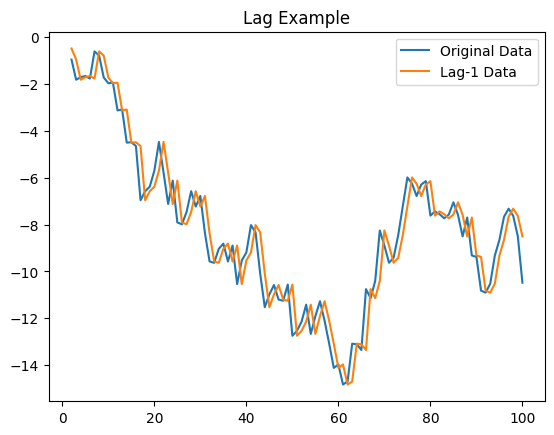

In [6]:
# Creating lag data
lag_data = autocorr_data.shift(1)

plt.plot(time[1:], autocorr_data[1:], label='Original Data')
plt.plot(time[1:], lag_data[1:], label='Lag-1 Data')
plt.legend()
plt.title('Lag Example')
plt.show()

### G. White Noise <a id='White-Noise'></a>

**Definition**: White noise is a time series that consists of random fluctuations with a constant mean and variance, and no autocorrelation.

#### Example:
Simulating a series with no discernible pattern or structure.

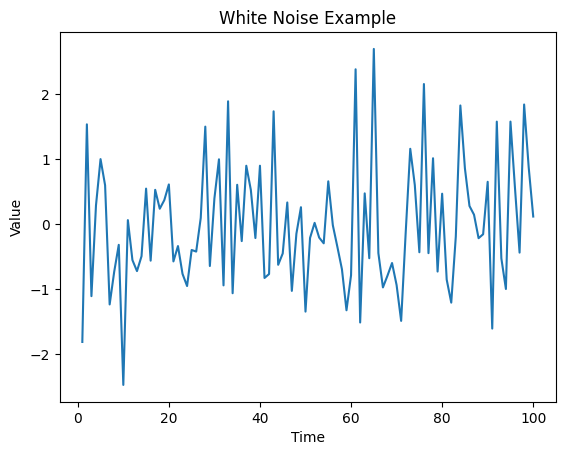

In [7]:
white_noise = np.random.normal(0, 1, 100)

plt.plot(time, white_noise)
plt.title('White Noise Example')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

### H. Moving Average <a id='Moving-Average'></a>

**Definition**: Moving average smooths out time series data by averaging values over a fixed window size. This reduces noise and reveals underlying trends.

#### Example:
In financial markets, a 10-day moving average is often used to smooth out stock prices.

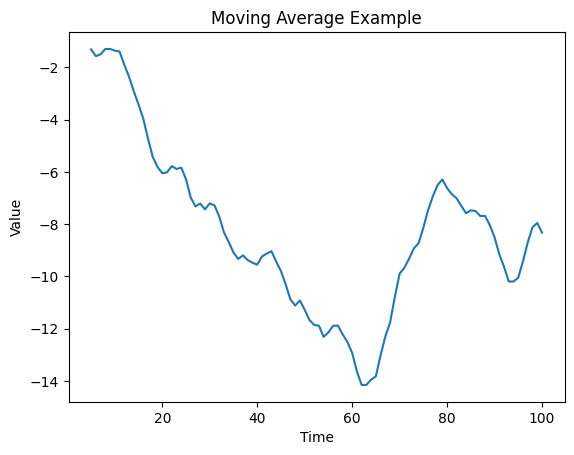

In [8]:
# Simulating moving average
window_size = 5
moving_avg = np.convolve(autocorr_data, np.ones(window_size)/window_size, mode='valid')

plt.plot(time[len(time) - len(moving_avg):], moving_avg)
plt.title('Moving Average Example')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

### I. ARIMA <a id='ARIMA'></a>

**Definition**: ARIMA (AutoRegressive Integrated Moving Average) is a widely-used model for time series forecasting that combines autoregression (AR), differencing (I), and moving average (MA).

#### Example:
Forecasting energy consumption using an ARIMA model.

In [9]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(autocorr_data, order=(1, 1, 1))
model_fit = model.fit()

# Forecasting
forecast = model_fit.forecast(steps=10)
print(forecast)

100   -10.424435
101   -10.386751
102   -10.362733
103   -10.347425
104   -10.337669
105   -10.331451
106   -10.327488
107   -10.324962
108   -10.323352
109   -10.322326
Name: predicted_mean, dtype: float64


c:\Users\zahra\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\zahra\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


### J. Forecasting <a id='Forecasting'></a>

**Definition**: Forecasting is the process of predicting future values of a time series based on past data, typically using models like ARIMA, exponential smoothing, or machine learning models.

#### Example:
Predicting future sales for the next 6 months using historical data.

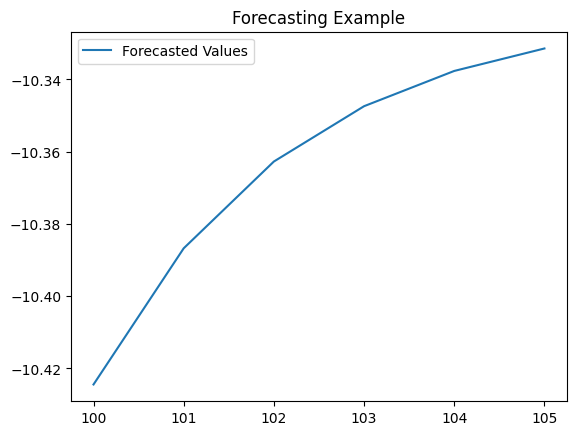

In [10]:
forecast_values = model_fit.forecast(steps=6)
plt.plot(forecast_values, label='Forecasted Values')
plt.legend()
plt.title('Forecasting Example')
plt.show()

### K. Outliers <a id='Outliers'></a>

**Definition**: Outliers are data points that significantly deviate from the general pattern of a time series. These can be caused by unusual events and need to be handled carefully during analysis.

#### Example:
Sudden spikes in sales due to a one-time promotional event could be considered outliers.

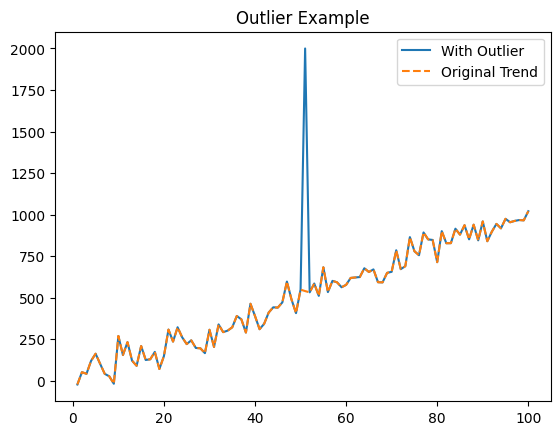

In [11]:
# Simulating outliers
import numpy as np
import matplotlib.pyplot as plt

# Simulating a trend
time = np.arange(1, 101)
trend = time * 10 + np.random.normal(0, 50, 100)

# Simulating outliers
outliers = trend.copy()
outliers[50] = 2000  # Introducing an outlier

# Plotting the trend with an outlier
plt.plot(time, outliers, label='With Outlier')
plt.plot(time, trend, label='Original Trend', linestyle='--')
plt.legend()
plt.title('Outlier Example')
plt.show()

### Conclusion <a id='Conclusion'></a>

Time series analysis is a powerful tool for understanding temporal data. The key terms discussed—trend, seasonality, stationarity, autocorrelation, lag, moving average, and ARIMA—are fundamental concepts for working with time series data. With this knowledge, you can start exploring and modeling time-dependent datasets in real-world applications like finance, economics, and weather forecasting.

### Information About The Creator

---

**Zahra Haider**

[Kaggle](https://www.kaggle.com/zahrahaider101)     
[X-Twitter](https://x.com/zahrahaider101)               
[Instagram](https://www.instagram.com/zahrahaider101/)
